In [ ]:
#import packages

from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl 
import math
from sklearn import datasets, linear_model, metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error
import random

# **Part 1:** Download the  data-set: link (under HDR 2020 Tables and Dashboards -> Table 1: Human Development Index and components)


In [ ]:
# upload data
uploaded = files.upload()

Saving 2020_Statistical_Annex_Table_1.xlsx to 2020_Statistical_Annex_Table_1.xlsx


In [ ]:
# read data to pandas dataframe
data = pd.read_excel("2020_Statistical_Annex_Table_1.xlsx",usecols=[0,1,2,4,6,8,10,12,14],skiprows=7)

data.head()

,Unnamed: 0,VERY HIGH HUMAN DEVELOPMENT,Unnamed: 2,Unnamed: 4,Unnamed: 6,Unnamed: 8,Unnamed: 10,Unnamed: 12,Unnamed: 14
0,1.0,Norway,0.957,82.4,18.06615,12.89775,66494.25217,7,1
1,2.0,Ireland,0.955,82.31,18.70529,12.666331,68370.58737,4,3
2,2.0,Switzerland,0.955,83.78,16.32844,13.380812,69393.52076,3,2
3,4.0,"Hong Kong, China (SAR)",0.949,84.86,16.92947,12.27996,62984.76553,7,4
4,4.0,Iceland,0.949,82.99,19.08309,12.772787,54682.38057,14,4


In [ ]:
# rename columns
data = data.rename(columns={'Unnamed: 0':'HDI_rank_2019', 'VERY HIGH HUMAN DEVELOPMENT':"country", 'Unnamed: 2':'HDI_2019', 'Unnamed: 4':'life_expectancy_2019',
       'Unnamed: 6':'expected_years_of_schooling_2019', 'Unnamed: 8':'mean_years_of_schooling_2019', 'Unnamed: 10':'GNI_per_capita', 'Unnamed: 12':'GNI_per_capita_minus_HDI_Rank_2019',
       'Unnamed: 14':'HDI_rank_2018'})

data.head()

,HDI_rank_2019,country,HDI_2019,life_expectancy_2019,expected_years_of_schooling_2019,mean_years_of_schooling_2019,GNI_per_capita,GNI_per_capita_minus_HDI_Rank_2019,HDI_rank_2018
0,1.0,Norway,0.957,82.4,18.06615,12.89775,66494.25217,7,1
1,2.0,Ireland,0.955,82.31,18.70529,12.666331,68370.58737,4,3
2,2.0,Switzerland,0.955,83.78,16.32844,13.380812,69393.52076,3,2
3,4.0,"Hong Kong, China (SAR)",0.949,84.86,16.92947,12.27996,62984.76553,7,4
4,4.0,Iceland,0.949,82.99,19.08309,12.772787,54682.38057,14,4


In [7]:
# drop rows with null HDI_rank_2019 value 
data = data[~data.HDI_rank_2019.isna()]

In [8]:
# reset dataset index
data = data.reset_index()
data.drop(labels="index", axis=1, inplace=True)
data

,HDI_rank_2019,country,HDI_2019,life_expectancy_2019,expected_years_of_schooling_2019,mean_years_of_schooling_2019,GNI_per_capita,GNI_per_capita_minus_HDI_Rank_2019,HDI_rank_2018
0,1.0,Norway,0.957,82.4,18.06615,12.89775,66494.25217,7,1
1,2.0,Ireland,0.955,82.31,18.70529,12.666331,68370.58737,4,3
2,2.0,Switzerland,0.955,83.78,16.32844,13.380812,69393.52076,3,2
3,4.0,"Hong Kong, China (SAR)",0.949,84.86,16.92947,12.27996,62984.76553,7,4
4,4.0,Iceland,0.949,82.99,19.08309,12.772787,54682.38057,14,4
...,...,...,...,...,...,...,...,...,...
184,185.0,Burundi,0.433,61.58,11.06933,3.287983,753.908748,4,184
185,185.0,South Sudan,0.433,57.85,5.296258,4.8,2003.318894,-10,186
186,187.0,Chad,0.398,54.24,7.34935,2.52368,1555.373575,-5,187
187,188.0,Central African Republic,0.397,53.28,7.56836,4.282,993.008842,0,188


# **Part 2:** Compute three insightful statistics from the data-set you would like to share, and give a motivation of why they might be relevant.


In [ ]:
# first statistics
statistic1=(data["expected_years_of_schooling_2019"]-data["mean_years_of_schooling_2019"])/data["life_expectancy_2019"]#operations are coordinate-wise

data["statistic1"]=statistic1

#-- Motivation: 
#------ the difference of expected years of schooling compared to mean is that it represents, how much a "normal" person of that country is investing in his/her 
#------education compared to the past.

#------of course, 1 more year of investment in education counts more if the life expectancy of the country is 50 years opposed to 80 for example, so by dividing
#------ with life_expectancy we get that ratio.

# Second statistics
statistic2= data["HDI_rank_2019"] - data["HDI_rank_2018"]

data["statistic2"]=statistic2

#-- Motivation: show  whether the country increase, decrease or remain the same in terms of its HDI rank between 2018 and 2019.

# Third statistics

statistic3= (data["life_expectancy_2019"] * data["GNI_per_capita"])/data["mean_years_of_schooling_2019"]

data["statistic3"]=statistic3

#-- Motivation: show the contribution of one year of schooling to the GNI per capita.

data

,HDI_rank_2019,country,HDI_2019,life_expectancy_2019,expected_years_of_schooling_2019,mean_years_of_schooling_2019,GNI_per_capita,GNI_per_capita_minus_HDI_Rank_2019,HDI_rank_2018,statistic1,statistic2,statistic3
0,1.0,Norway,0.957,82.4,18.06615,12.89775,66494.25217,7,1,0.062723,0.0,424812.574194
1,2.0,Ireland,0.955,82.31,18.70529,12.666331,68370.58737,4,3,0.073368,-1.0,444294.663433
2,2.0,Switzerland,0.955,83.78,16.32844,13.380812,69393.52076,3,2,0.035183,0.0,434487.009543
3,4.0,"Hong Kong, China (SAR)",0.949,84.86,16.92947,12.27996,62984.76553,7,4,0.05479,0.0,435252.818647
4,4.0,Iceland,0.949,82.99,19.08309,12.772787,54682.38057,14,4,0.076037,0.0,355293.705309
...,...,...,...,...,...,...,...,...,...,...,...,...
184,185.0,Burundi,0.433,61.58,11.06933,3.287983,753.908748,4,184,0.126362,1.0,14119.812759
185,185.0,South Sudan,0.433,57.85,5.296258,4.8,2003.318894,-10,186,0.008578,-1.0,24144.166254
186,187.0,Chad,0.398,54.24,7.34935,2.52368,1555.373575,-5,187,0.088969,0.0,33428.747982
187,188.0,Central African Republic,0.397,53.28,7.56836,4.282,993.008842,0,188,0.061681,0.0,12355.794278


# **Part 3:** Show through graph(s) if there seems to be a relation between ‘Expected years of schooling’ with ‘Life expectancy at birth’ and ‘Gross national income (GNI) per capita’.

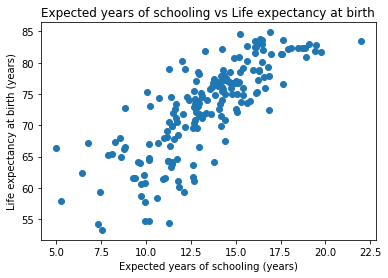

In [ ]:
#  Expected years of schooling vs Life expectancy at birth scatter plot
 
# Creating plot
plt.scatter(data['expected_years_of_schooling_2019'], data['life_expectancy_2019'])

plt.xlabel('Expected years of schooling (years)')
plt.ylabel('Life expectancy at birth (years)')

# Add title and axis names
plt.title('Expected years of schooling vs Life expectancy at birth')
 
# show plot
plt.show()

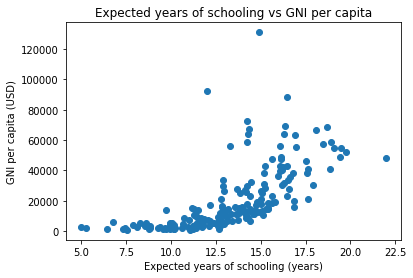

In [ ]:
#  expected years of schooling vs GNI per capita scatter plot
 
# Creating plot
plt.scatter(data['expected_years_of_schooling_2019'], data['GNI_per_capita'])
plt.xlabel('Expected years of schooling (years)')
plt.ylabel('GNI per capita (USD)')

# Add title and axis names
plt.title('Expected years of schooling vs GNI per capita')
 
# show plot
plt.show()

# **Part 4:** provide and graph a model for predicting life expectancy based on ‘Expected years of schooling’. Show also the current data points in this graph.


The model that we are using is polynomial regression. The error of the model is dependant on the degree that we select for polynomial (and also the random component of cross validation). Therefore, we find the optimal degree by calculating the mean square error (MSE) of degrees from 1 to 7.

Furthermore, we use cross validation in order to try and prevent overfitting the model. We do this by, for each degree, randomly splitting the dataset into a training set of 160 datapoints and use the rest of the datapoints as a test set. Then, we train the model using the training set and calculate the MSE of the test set. We repeat this process 500 times and then calculate a mean error from all of the 500 MSEs for each degree.

[21.065227749950925, 21.594394404499504, 20.01842075649733, 20.307161739521263, 20.228801781073194, 21.90854875997431, 58.32229201791842]


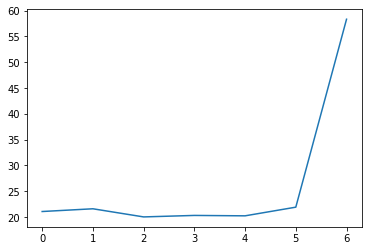

In [9]:
error_curve = list()
for i in range(7):

  degree = i+1

  X = data["expected_years_of_schooling_2019"].to_numpy().reshape(-1,1)
  y = data["life_expectancy_2019"].to_numpy().reshape(-1,1)

  # Set the number of iterations for the cross validation
  n=500
  errors=[0 for i in range(n)]

  for j in range(n):
    
    # Radomly splitting the dataset into training and test sets
    index = [i for i in range(189)]
    random.shuffle(index)
    train = index[:160]
    test = index[160:]

    # Train the model using the training set
    polyreg=make_pipeline(PolynomialFeatures(degree),linear_model.LinearRegression())
    polyreg.fit(X[train],y[train])

    # Calculate the MSE of one iteration
    errors[j] = mean_squared_error(y_true=y[test], y_pred=polyreg.predict(X[test]))

  # Calculate the mean error of all 500 MSEs for one degree
  error_curve.append(sum(errors)/n)

# Plot the errors of each degree
print(error_curve)
plt.plot(error_curve)
plt.show()


Here, we can see that polynomial regression with a degree of 3 gave the lowest test error. Therefore, we choose a degree of 3 for plotting the graph of the model.

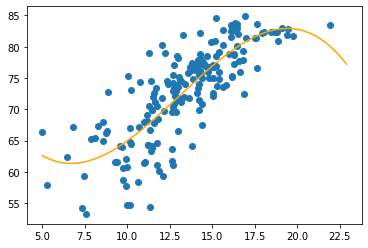

In [10]:
X = data["expected_years_of_schooling_2019"].to_numpy().reshape(-1,1)
y = data["life_expectancy_2019"].to_numpy().reshape(-1,1)

degree=3

# Train the model
polyreg=make_pipeline(PolynomialFeatures(degree),linear_model.LinearRegression())
polyreg.fit(X,y)

# Create X-values used for plotting the graph of the model
X_plot = np.arange(5, 23, 0.1).reshape(-1,1)

# Plot the graph model
plt.plot(X_plot, polyreg.predict(X_plot), color="orange")

# Plot the individual datapoints
plt.scatter(X,y)

plt.show()